In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [28]:
df.shape

(32561, 15)

In [29]:
ques=df[df == '?']

In [30]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No missing value but contain "?" 

In [32]:
total_question_marks = (df.values == '?').sum()
print("Total number of '?' occurrences in the dataset:", total_question_marks)

Total number of '?' occurrences in the dataset: 4262


In [33]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [34]:
df.replace('?',np.NaN,inplace=True)

In [35]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Replacing Nan with mode

In [41]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [42]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [40]:
df.to_csv('filled_df.csv', index=False)

Summary Statistics:

In [43]:
print(df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


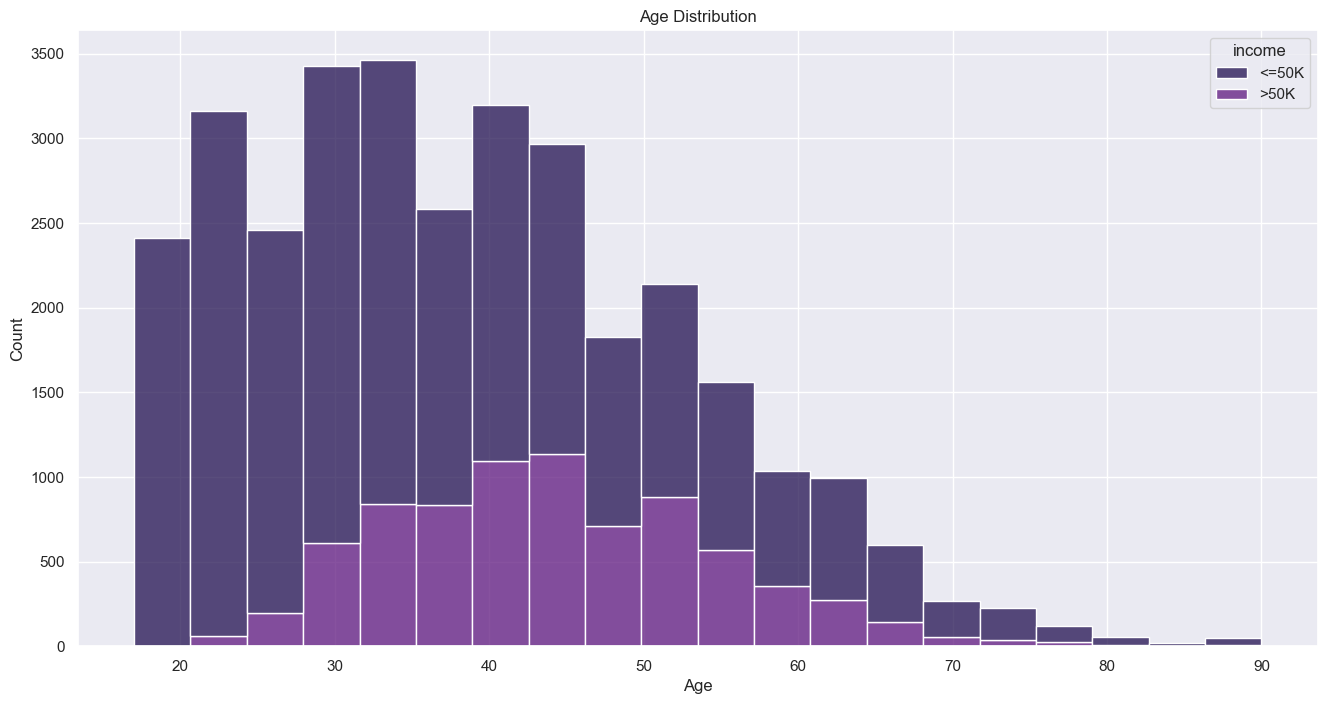

In [51]:
plt.figure(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("magma")
sns.histplot(data=df, x='age', hue='income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

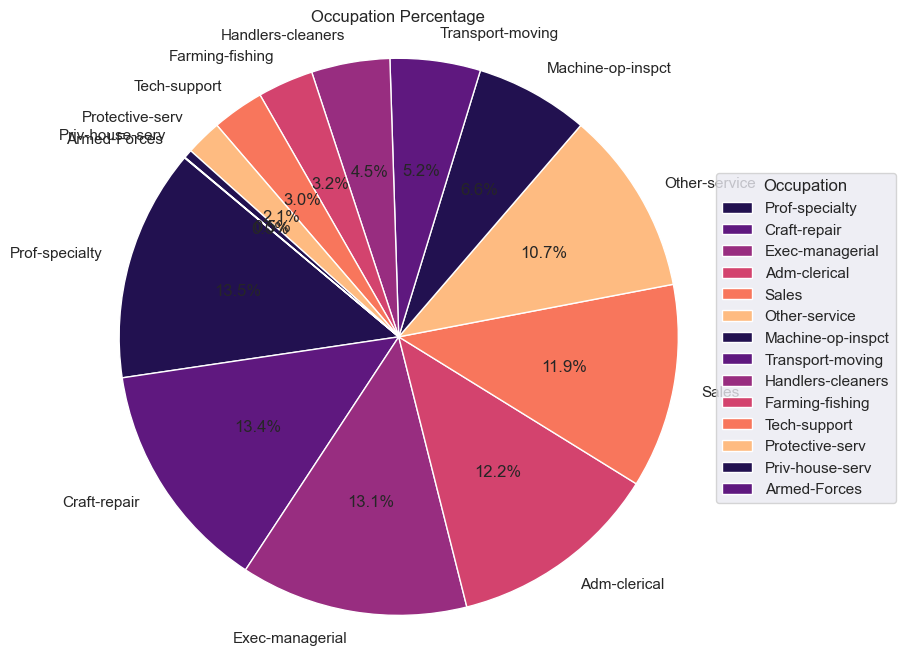

In [63]:
occupation_percentages = df['occupation'].value_counts(normalize=True) * 100

# Plotting a pie chart for occupation percentages
plt.figure(figsize=(8,8))
plt.pie(occupation_percentages, labels=occupation_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Occupation Percentage')
plt.axis('equal')

# Adding an index (legend) on the side
plt.legend(title='Occupation', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
dtype: int64


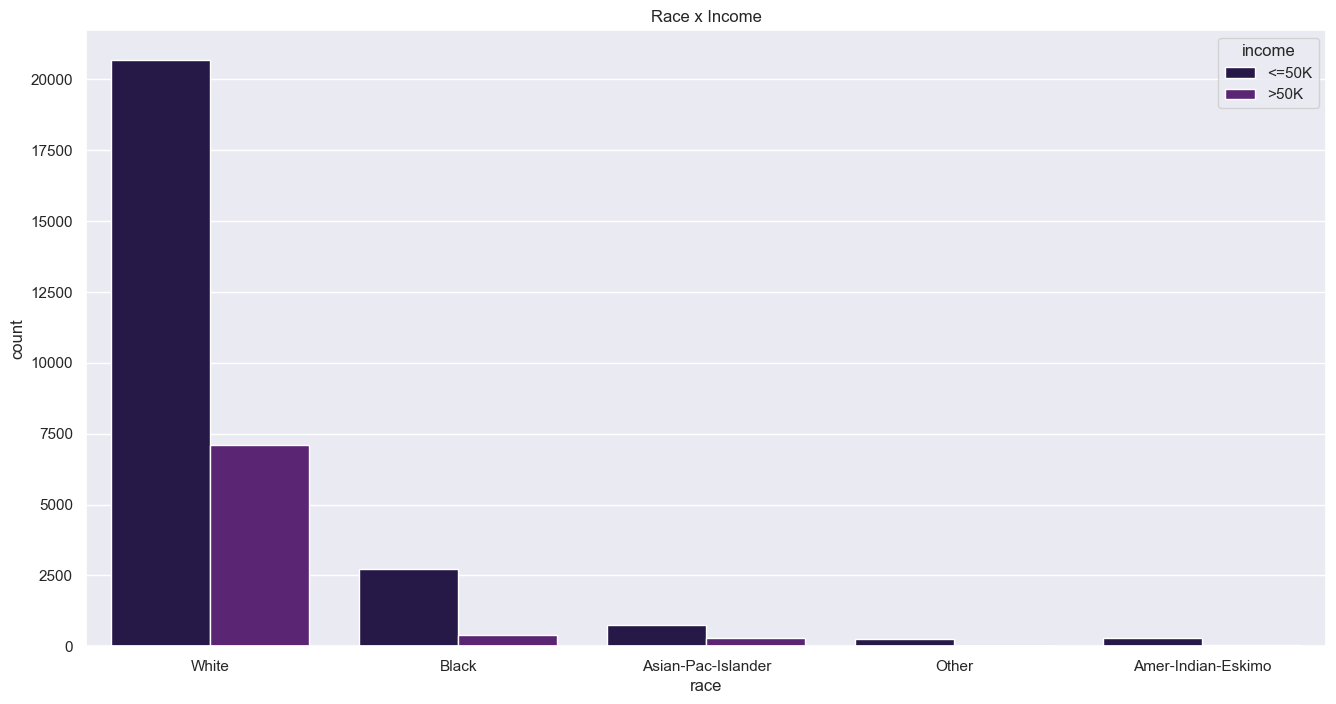

sex
Female    10771
Male      21790
dtype: int64


Text(0.5, 1.0, 'Sex x Income')

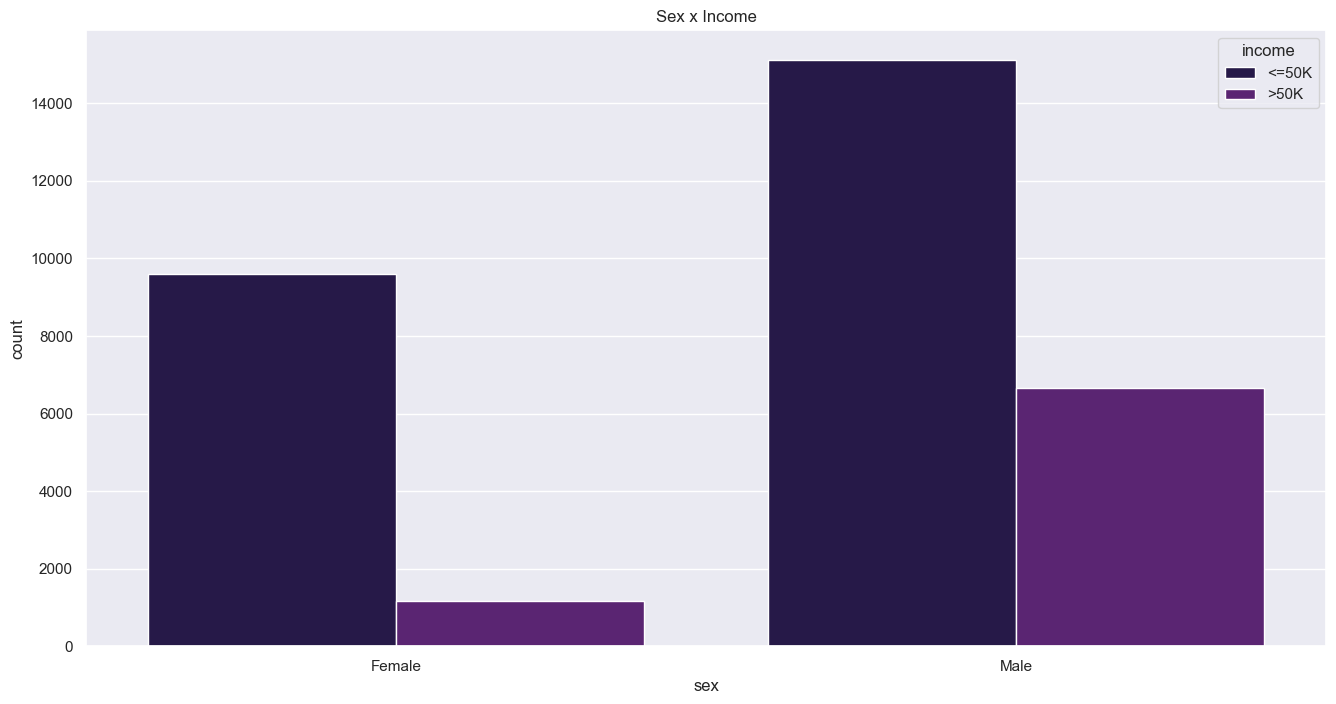

In [64]:
# Race and Sex
plt.figure(figsize=(16, 8))
print(df.groupby(df.race).size())
sns.countplot(data=df, x='race', hue='income')
plt.title('Race x Income')
plt.show()
plt.figure(figsize=(16, 8))
print(df.groupby(df.sex).size())
sns.countplot(data=df, x='sex', hue='income')
plt.title('Sex x Income')

([<matplotlib.patches.Wedge at 0x7fa890a28fa0>,
 [Text(1.0999979520147993, 0.002122631208569781, 'Cambodia'),
  Text(1.0998639704681585, 0.017298741746667144, 'Canada'),
  Text(1.0993328285549082, 0.03830577060268034, 'China'),
  Text(1.0987355649810273, 0.05272720593605217, 'Columbia'),
  Text(1.097810835746858, 0.06936403186656305, 'Cuba'),
  Text(1.09654233481448, 0.08714876912274111, 'Dominican-Republic'),
  Text(1.0956504694755005, 0.09772435079403545, 'Ecuador'),
  Text(1.0942630506514297, 0.11219793215129505, 'El-Salvador'),
  Text(1.0918686743819233, 0.13350205205711851, 'England'),
  Text(1.0902216216265126, 0.14634485210644566, 'France'),
  Text(1.0876905473474094, 0.16410141136228307, 'Germany'),
  Text(1.0848351853625502, 0.18202368142470282, 'Greece'),
  Text(1.083084163243019, 0.1921684035739734, 'Guatemala'),
  Text(1.0809640346485287, 0.20375660920906205, 'Haiti'),
  Text(1.0800490722141112, 0.20855215560966456, 'Holand-Netherlands'),
  Text(1.0797663818001733, 0.210010

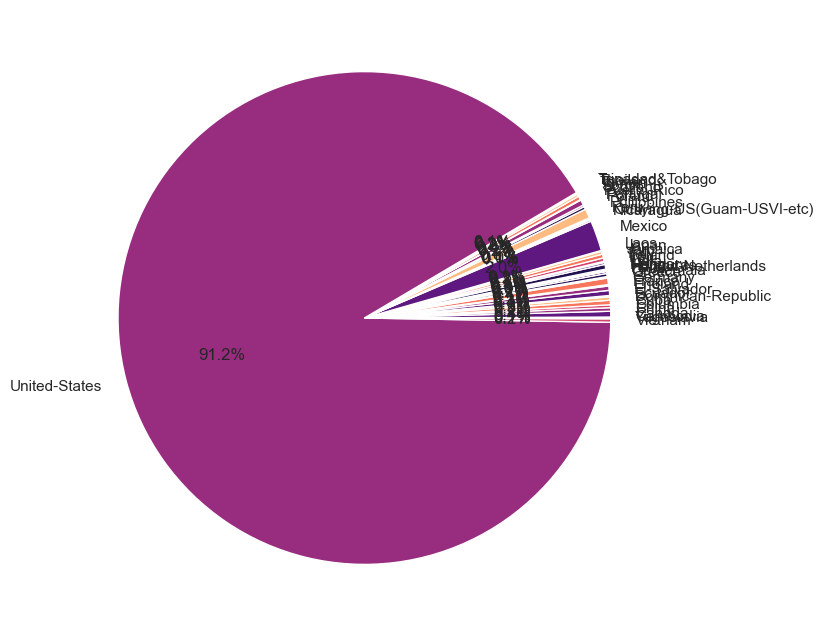

In [66]:
plt.figure(figsize=(16, 8))
plt.pie(df.groupby('native.country').size(), labels=df.groupby('native.country').size().index, autopct='%1.1f%%')

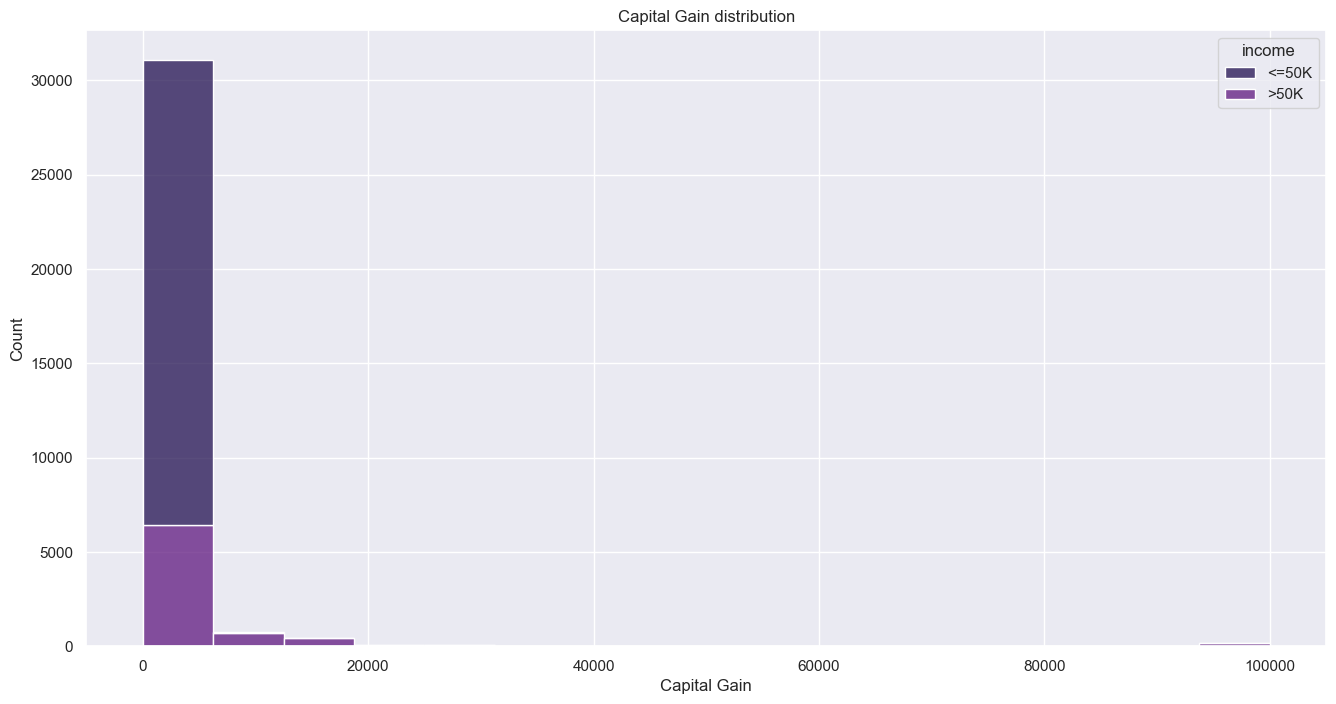

Text(0.5, 0, 'Capital Loss')

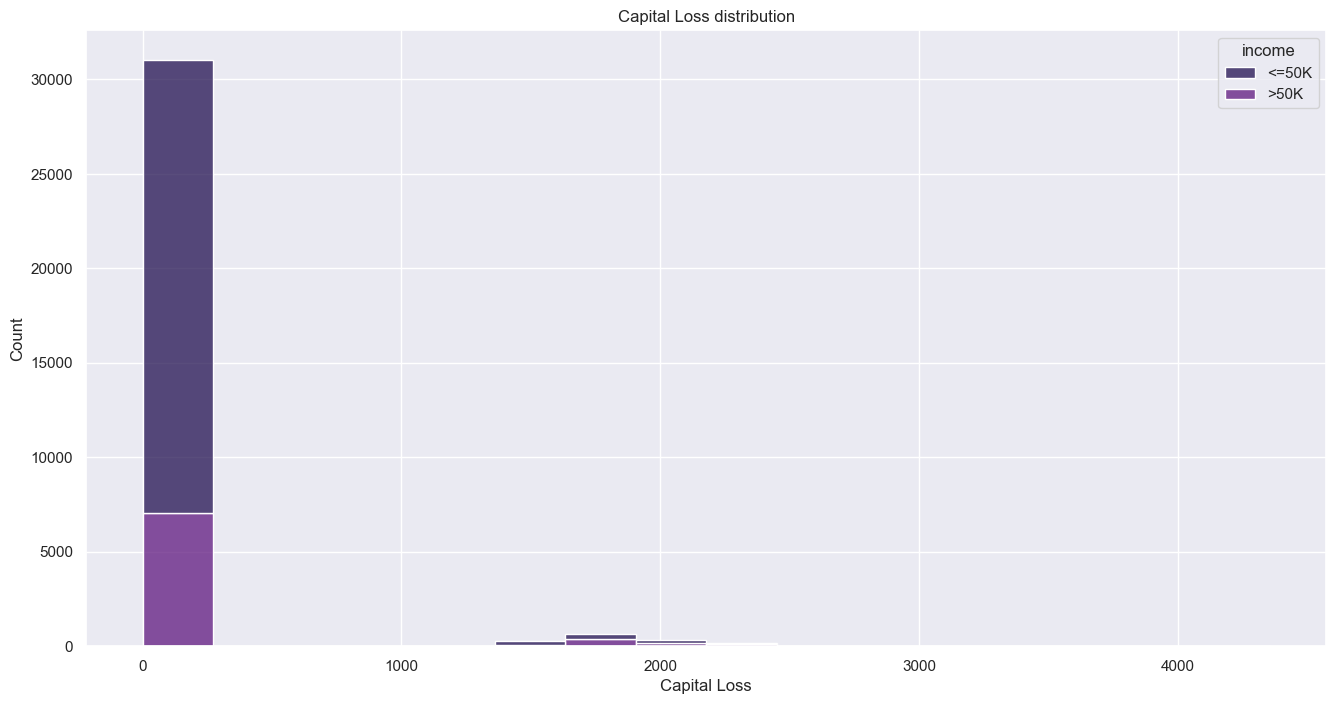

In [67]:
plt.figure(figsize=(16, 8))
sns.histplot(x='capital.gain', data=df, hue='income', multiple='stack')
plt.title('Capital Gain distribution')
plt.xlabel('Capital Gain')
plt.show()
plt.figure(figsize=(16, 8))
sns.histplot(x='capital.loss', data=df, hue='income', multiple='stack')
plt.title('Capital Loss distribution')
plt.xlabel('Capital Loss')